In [1]:
%matplotlib inline


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [29]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from joblib import dump, load
import pandas as pd

Automatically created module for IPython interactive environment


## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



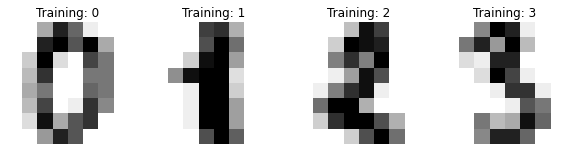

In [9]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [74]:
# flatten the images
n_samples = len(digits.images)
print(n_samples)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)
# Create a classifier: a Gradient Boosting Classifier
#clf = GradientBoostingClassifier(n_estimators=500,learning_rate=0.2,max_depth=4)

# Split data into 60% train and 40% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.4, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

1797


Below we visualize the first 4 test samples and show their predicted
digit value in the title.



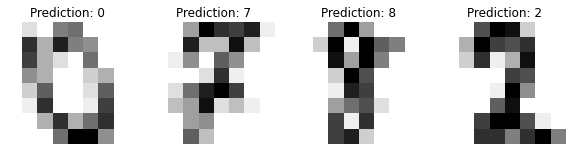

In [75]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [76]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.99      0.96      0.97        73
           2       0.99      0.97      0.98        71
           3       0.97      0.84      0.90        74
           4       0.99      0.96      0.97        74
           5       0.95      0.99      0.97        71
           6       0.99      0.99      0.99        74
           7       0.95      1.00      0.97        72
           8       0.92      1.00      0.96        68
           9       0.95      0.97      0.96        71

    accuracy                           0.97       719
   macro avg       0.97      0.97      0.96       719
weighted avg       0.97      0.97      0.96       719




We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[70  0  0  0  1  0  0  0  0  0]
 [ 0 70  1  0  0  0  0  0  1  1]
 [ 1  0 69  1  0  0  0  0  0  0]
 [ 0  0  0 62  0  3  0  4  5  0]
 [ 0  0  0  0 71  0  0  0  0  3]
 [ 0  0  0  0  0 70  1  0  0  0]
 [ 0  1  0  0  0  0 73  0  0  0]
 [ 0  0  0  0  0  0  0 72  0  0]
 [ 0  0  0  0  0  0  0  0 68  0]
 [ 0  0  0  1  0  1  0  0  0 69]]


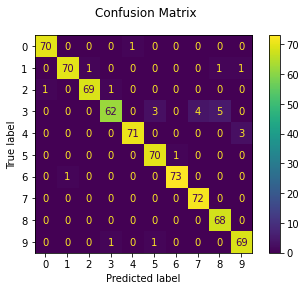

In [77]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [78]:
pd.DataFrame(X_test).sample(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
547,0.0,2.0,13.0,16.0,7.0,0.0,0.0,0.0,0.0,12.0,...,2.0,0.0,0.0,1.0,16.0,14.0,13.0,16.0,9.0,0.0


In [79]:
pd.DataFrame(X_test).sample(1).to_csv('sample_image_app_base.csv')

In [80]:
dump(clf,'model_SVC_97_app_base_sample.joblib',compress=3)

['model_SVC_97_app_base_sample.joblib']

In [19]:
from joblib import dump, load
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
model_loaded = load('model_SVC_97_app_base_sample.joblib')

In [21]:
df = pd.read_csv('sample_image_app_base.csv',index_col=0)

In [22]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
674,0.0,0.0,4.0,10.0,12.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,9.0,10.0,0.0,0.0,0.0


In [23]:
predicted = model_loaded.predict(df)

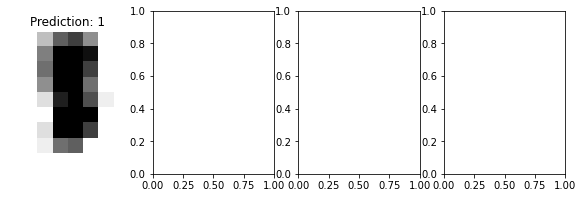

In [26]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, np.array(df), predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')